In [54]:
import re
import matplotlib.pyplot as plt


def get_train_acc(log_file):
    train_acc_list = []
    log = open(log_file,'r')
    for line in log.readlines():
        match = re.findall('rain_acc \d+.\d+', line)
        if match:
            train_acc = match[0].split(' ')[1]
            train_acc_list.append(float(train_acc))
        
    return train_acc_list

def get_valid_acc(log_file):
    valid_acc_list = []
    log = open(log_file,'r')
    for line in log.readlines():
        match = re.findall('alid_acc.? \d+.\d+', line)
        if match:
            valid_acc = match[0].split(' ')[1]
            valid_acc_list.append(float(valid_acc))
        
    return valid_acc_list

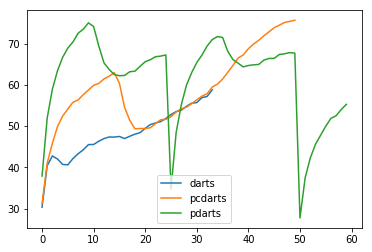

In [55]:
darts_search = get_train_acc('./DARTS_LBJ/search.out')
pcdarts_search = get_train_acc('./PC-DARTS/search.out')
pdarts_search = get_train_acc('./PDARTS/search.out')

plt.plot(darts_search, label='darts')
plt.plot(pcdarts_search, label='pcdarts')
plt.plot(pdarts_search, label='pdarts')

plt.legend()

96.51

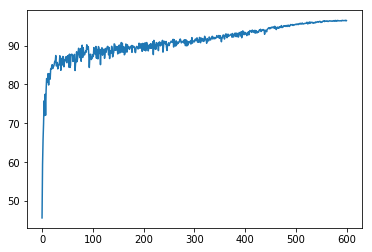

In [56]:
pdarts_train = get_valid_acc('./PDARTS/adv_nop_train/log.txt')
plt.plot(pdarts_train, label='pdarts')
max(pdarts_train)

91.11

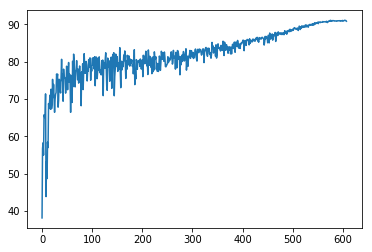

In [57]:
pcdarts_train = get_valid_acc('./PC-DARTS/saved_models/log.txt')
plt.plot(pcdarts_train, label='pcdarts')
max(pcdarts_train)